#### **Проверка знаний**

Проверим полученные знания на практике. Для выполнения практических заданий нам понадобится новый датасет - *heart.csv*.

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания *target* - наличие у пациента болезни сердца.

<img src="images/Датасет болезней сердца (практика).png">

In [182]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import statistics as st
# Импорт для работы с кодировщиком
import category_encoders as ce
# Для нормализации, стандартизации
from sklearn import preprocessing
# Для построения графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Для отключения всех предупреждений
import warnings
warnings.filterwarnings('ignore')

Прочитаем наш файл и выведем первые пять строк таблицы с помощью метода **head(),** чтобы убедиться в том, что всё подгрузилось верно:

In [183]:
df_diseases_heart = pd.read_csv('data/heart.csv')
df_diseases_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**1.** Создадим новый признак *old*, где **1 -** при возрасте пациента более *60* лет. В ответ введем результат выполнения кода - *heart["old"].sum().*

In [184]:
df_diseases_heart["old"] = df_diseases_heart["age"].apply(lambda x: 1 if x > 60 else 0)
df_diseases_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


Выведем результат выполнения кода - *heart["old"].sum().*

In [185]:
df_diseases_heart["old"].sum()

79

**2.** Создадим новый признак *trestbps_mean*, который будет обозначать норму давления в среднем для его возраста и пола. *trestbps* - систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмем из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

<img src="images/Таблица о среднем давлении.png">

В ответ напишем значение признака *trestbps_mean* для пациента под номером *300*.

In [186]:
# Функция возвращает значение признака trestbps_mean в зависимости от возраста и пола
def get_trestbps_mean(row):
    if row["sex"] == 1:
        if row["age"] <= 20:
            return 123
        elif 21 <= row["age"] <= 30:
            return 126
        elif 31 <= row["age"] <= 40:
            return 129
        elif 41 <= row["age"] <= 50:
            return 135
        else:
            return 142
    else:
        if row["age"] <= 20:
            return 116
        elif 21 <= row["age"] <= 30:
            return 120
        elif 31 <= row["age"] <= 40:
            return 127
        elif 41 <= row["age"] <= 50:
            return 137
        elif 51 <= row["age"] <= 60:
            return 144
        else:
            return 159
        
# Создаем и выводим значение нового признака для пациента под номером 300        
df_diseases_heart["trestbps_mean"] = df_diseases_heart[["age", "sex"]].apply(get_trestbps_mean, axis=1)
print(df_diseases_heart["trestbps_mean"][300])

142


Выведем получившийся результат:

In [187]:
df_diseases_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


**3.** Проанализируем датасет и выберем **категориальные признаки** и это ...

* **sex -** *пол (1 - мужчина, 0 - женщина)*;
* **cp -** *тип боли в груди (4 значения)*;
* **fbs -** *уровень сахара в крови натощак > 120 мг/дл*;
* **restecg -** *результаты электрокардиографии в покое (значения 0, 1, 2)*;
* **exang -** *стенокардия, вызванная физической нагрузкой*;
* **slope -** *наклон пикового сегмента ST при нагрузке*;
* **ca -** *количество крупных сосудов (0-3), окрашенных при флюроскопии*;
* **thal -** *дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект*;
* **target -** *наличие у пациента болезни сердца*.

**4.** Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируем их и назовем те, которые нуждаются в дополнительном кодировании значений (например, *OneHotEncoding*).

* **cp -** *тип боли в груди (4 значения)*;
* **restecg -** *результаты электрокардиографии в покое (значения 0, 1, 2)*;
* **slope -** *наклон пикового сегмента ST при нагрузке*;
* **ca -** *количество крупных сосудов (0-3), окрашенных при флюроскопии*;
* **thal -** *дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект*.

**5.** Закодируем вышеперечисленные признаки методом **OneHotEncoding** из библиотеки *Category Encoders*, удалив исходные признаки. Параметр **use_cat_names** оставим по умолчанию. Сколько же признаков получилось в датасете ?

In [188]:
# Указываем столбец для кодирования
encoder = ce.OneHotEncoder(cols=["cp", "restecg", "slope", "ca", "thal"], use_cat_names=True)                          
type_bin = encoder.fit_transform(df_diseases_heart[["cp", "restecg", "slope", "ca", "thal"]])
df_diseases_heart = pd.concat([df_diseases_heart, type_bin], axis=1)
df_diseases_heart = df_diseases_heart.drop(["cp"], axis=1)
df_diseases_heart = df_diseases_heart.drop(["restecg"], axis=1)
df_diseases_heart = df_diseases_heart.drop(["slope"], axis=1)
df_diseases_heart = df_diseases_heart.drop(["ca"], axis=1)
df_diseases_heart = df_diseases_heart.drop(["thal"], axis=1)
df_diseases_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,1,1,0,0,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,1,0,0,0,0,0,0,1,0
300,68,1,144,193,1,141,0,3.4,0,1,...,1,0,1,0,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,...,1,0,0,1,0,0,0,0,1,0


**6.** Нормализуем все числовые признаки подходящим способом.

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='chol', ylabel='Density'>

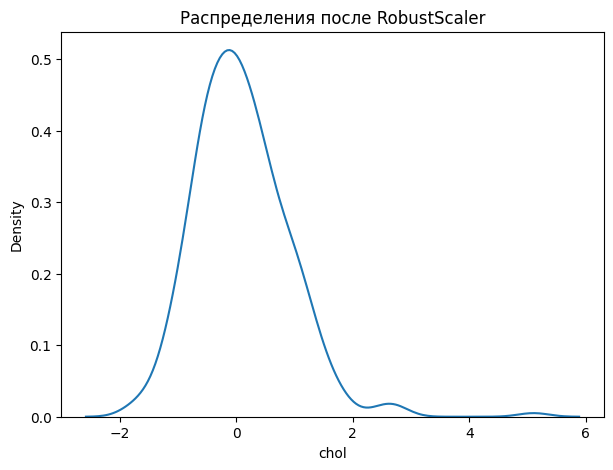

In [189]:
col_names = list(df_diseases_heart.columns)

# Инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Кодируем исходный датасет
df_diseases_heart_r = r_scaler.fit_transform(df_diseases_heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_diseases_heart_r = pd.DataFrame(df_diseases_heart_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(7, 5))
ax1.set_title("Распределения после RobustScaler")

sns.kdeplot(df_diseases_heart_r["chol"], ax=ax1)

In [190]:
# Получаем описательную статистику
df_diseases_heart_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


В ответе напишем стандартное отклонение признака *chol*. Ответ округлим до шести знаков после запятой.

In [191]:
print(round(st.stdev(df_diseases_heart_r["chol"]), 6))

0.816232


**7.** Проведем корреляционный анализ и отберем признаки для будущей модели. Выберем пары сильно скоррелированных признаков.

* *[age, old]*;
* *[age, trestbps_mean]*;
* *[thal_2, thal_3]*;
* *[restecg_1, restecg_2]*;
* *[slope_2, slope_3]*.